In [5]:
import numpy as np

## Visualización de datos 

Los gráficos ocupan un lugar central en la estadística moderna, ya sea en el análisis exploratorio de datos como en la estadística inferencial. 

La visualización de datos tiene una componente estética y una científica. El reto suele ser generar gráficos agradables sin perder la rigurosidad y verasidad de lo que se quiere mostrar.

## Buenas prácticas y fuentes de error

Es claro que usar una visualizacion para engañar a terceros no puede ser un objetivo, pero además hay que tener cuidado de no engañarse uno mismo. Es sabido desde hace décadas que un gráfico de barras es más efectivo para comparar valores que un gráfico de torta. La razón es que nuestro aparato perceptual es bastante bueno para evaluar longitudes, pero no muy bueno para evaluar áreas.

El siguiente gráfico muestra distintos elementos visuales ordenados según la precisión con la que el cerebro humano puede detectar diferencias y hacer comparaciones entre ellos

 <img src="imagenes/elementary_perceptual_tasks.png" width="450">


### Principios generales para usar colores 

Los ojos humanos funcionan percibiendo esencialmente 3 longitudes de onda, esta característica es usada en dispositivos técnológicos como pantallas para generar todos los colores a partir de combinaciones de 3 componentes. Lo que da origne al sistema RGB, R (red-rojo), G (green-verde), B (blue-azul). Pero este no es el único sistema posible. Otro muy comun es CYMK, utilizado por ejemplo por impresoras C (cyan-cian), Y (yellow-amarillo), M (magenta-magenta) y K (black-negro). Pero para analizar los atributos de percepción de un color, es mejor pensar en términos de HSL H (hue-tono), S (saturation-saturación) y L (lightness-luminosidad).

El tono es lo que coloquialmente llamamos "diferentes colores". Verde, rojo, etc.

La saturación es cuan colorido o desteñido percibimos un color. Dos colores con diferente tono se verán más diferentes cuando tengan más saturación:

Y la luminosidad corresponde a la cantidad de luz emitida (pantallas activas) o reflejada (impresiones), que van del negro al blanco:

Variar el tono es útil para distinguir facilmente categorías:

 <img src="imagenes/hue.png" width="450">
 
En principio somos capaces de distinguir un gran número de tonos, pero a medida que la cantidad de elementos o categorías a dinstinguir aumenta, la capacidad de distinguirlos disminuye. Esto sucede debido a que los tonos cada vez son más proximos entre si. Es decir suele ser fácil distinguir rojo de amarillo, pero si tenémos que distinguir entre rojo-amarillento y amarillo-rojizo entonces la efectividad de la visualización disminuye drásticamente. Otra razón es el límite de la memoria de trabajo. Asociar unos pocos colores (digamos 4) con categorias (paises, rangos de temperatura, etc) suele ser sencillo. Salvo que existan asociaciones pre-existentes, recordar más de unas $\approx$4 categorías se torna más complicado y suele ser necesario alternar continuamente entre el gráfico y la leyenda o texto donde se indica la asociación color-categoría. Agregar otros elementos, además del color, como formas puede ayudar, pero en general será más útil tratar de mantener el número de categorías relativamente bajo. Además, es importante tener en cuenta el contexto de presentación, si queremos mostrar una figura durante una presentación donde contamos con apenas unos pocos segundos para dedicarle a esa figura, es recomendable mantener la figura lo más simple posible. Esto puede implicar eliminar elementos y mostrar solo un subconjunto de los datos. Mientras que si la figura va a ir en un texto, donde podrá ser analizada como más tiempo por el lector, quizá la complejidad puede ser algo mayor.
 
Si bien antes mencionamos que los ojos humanos son capaces de distinguir tres colores principales (rojo, verde, azul), la capacidad de distinguir estos 3 colores varía entre personas, al punto que muchos individuos tienen dificultades para distinguir algunos colores. El caso más común sucede con el rojo y verde. Por esto es importante evitar el uso de esos colores. Una forma facil de evitar este problema es usar paletas *colorblind-friendly*. Más adelante veremos que esto es algo facil de hacer al usar Python para generar gráficos científicos.
 
 
Variar la luminosidad es útil cuando queremos representar "números", en general una escala continua

<img src="imagenes/lightness.png" width="450">

Con la paleta basada en tonos (izquierda), es bastante difícil determinar que nuestros datos muestran dos "picos", mietras que esto es más fácil de ver con la paleta que modifica la luminosidad (derecha). Variar la luminosidad ayuda a ver la estructura de los datos, ya que los cambios en la luminocidad se procesan de manera más intuitiva como cambios cuantitativos. Un detalle que debemos notar es que el gráfico de la derecha no cambia solo la luminosidad, no es una mapa en escala de grises o azules o rojos, etc. En realidad esa paleta cambia tambien el tono. Esto lo hace estéticamente más placentero y la sutil variación de tono contribuye a aumentar la distancia perceptiva entre dos valores y por lo tanto la capacidad de distinguir pequeñas diferencias.

Cuando usamos colores para representar variables numéricas es importante usar mapas uniformemente perceptuales [1](https://matplotlib.org/stable/tutorials/colors/colormaps.html#choosing-colormaps-in-matplotlib), [2](https://colorcet.holoviz.org/). Estos son mapas donde los colores varian de tal forma que reflejan adecuadamente cambios en los datos. No todos los mapas de colores son perceptualmente uniformes. De hecho obtenerlos no es trivial. La siguiente figura muestra la misma imagen usando diferentes mapas de colores. Podemos ver que mapas muy usados como jet (también llamado rainbow) genera distorciones en la imágen. En cambio viridis, un mapa de colores perceptualmente uniforme no genera tales distorciones. Una crítica común a los mapas perceptualmente uniformes es que a primera impresión parecen más "planos" o "aburridos". Y que en cambio mapas como jet, muestran mayor contranste. Pero ese es precisamente uno de los problemas de mapas como jet, la magnitud de esos contrastes no se correlaciona con los cambios en los datos, por lo que puede ocurir incluso extremos como mostrar constrastes donde no los hay, y ocultar diferencias donde si las hay.

 <img src="imagenes/colormaps.png" width="750">


## Matplotlib 

Existen varias librerías para hacer gráficos en Python, Matplotlib es una de las más usadas y más versátiles. Esta librería fue desarrollada con la finalidad de portar a Python las capacidades de generar gráficos de MATLAB y funciona de forma integrada con NumPy y SciPy.

Matplotlib esta diseñado de forma tal que se pueden crear gráficos simples con pocas lineas de código, pero su principal ventaja es que es posible modificar cada uno de los aspectos de los gráficos lo que permite crear gŕaficos arbitrariamente complejos, si uno esta dispuesto a escribir el código necesario.

La forma estandard de importar matplotlib es:

In [2]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind") 

Veamos como hacer un gráfico sencillo.

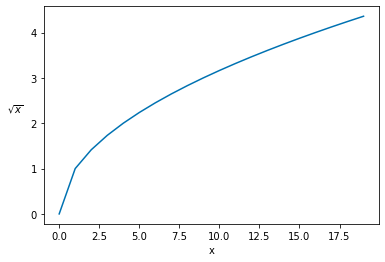

In [6]:
x = np.arange(20)
y = x**0.5

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel(r'$\sqrt{x}$', rotation=0, labelpad=15);

* En la primer y segunda linea estamos "generando" datos.
* En la tercer linea decimos que queremos generar un gráfico del tipo `plot` (ya veremos que los hay de otros tipos), donde graficaremos `x` vs `y`.
* En la cuarta y quinta linea agregamos rótulos a los ejes. En la quinta linea usamos la misma notación usada por [$LaTeX$](https://es.wikipedia.org/wiki/LaTeX) para escribir fórmulas matemáticas. $LaTeX$ es un _lenguaje_ para escribir textos que es muy usado en muchas disciplinas científicas para escribir papers, posters, diapositivas, libros, etc.

En matplotlibe es posible configurar algunos paramétros de forma global, el listado completo está en `plt.rcParams`, algunos parámetros son los DPI (puntos por pulgada), fuentes y sus tamaños, colores, etc.

Veamos por ejemplo de modificar el tamaño de la fuente.

In [7]:
plt.rcParams['font.size'] = 14

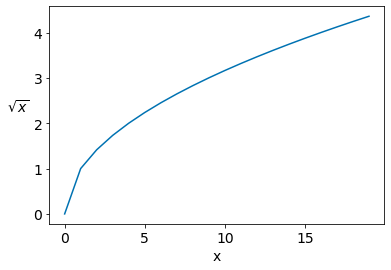

In [8]:
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel(r'$\sqrt{x}$', rotation=0, labelpad=15);

Cambiar el color y el estilo de las lineas es otra tarea usual al hacer gráficos. Si no especificamos valores para los colores pero realizamos más de un gráfica, entonces matplotlib automáticamente asignará distintos colores a las lineas siguiendo una paleta de colores predefenida.

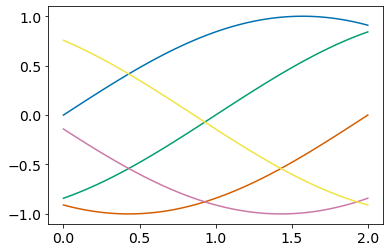

In [9]:
x = np.linspace(0, 2, 100)

for i in range(5):
    plt.plot(x, np.sin(x-i))

Existe una gran variedad de formas de especificar los colores, algunas de ellas son:

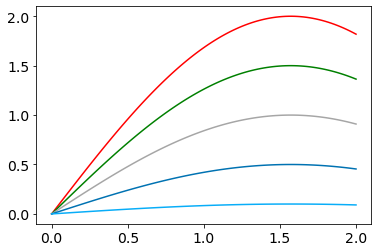

In [11]:
plt.plot(x, np.sin(x)*2, color='red')  # nombres de colores
plt.plot(x, np.sin(x)*1.5, color='g')  # otras opciones son rgb cmyk w
plt.plot(x, np.sin(x)*1, color='0.65')  # escala de grises 0 negro - 1 blanco
plt.plot(x, np.sin(x)*0.5, color='C0')  # Cx siendo x un número natural, los colores dependen del ciclo predefinido.
plt.plot(x, np.sin(x)*0.1, color='#08adf8');  # hexadecimal

También podemos especificar el formato de las lineas

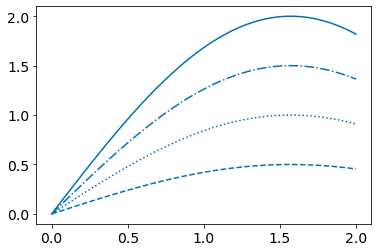

In [12]:
plt.plot(x, np.sin(x)*2, color="C0", linestyle='-')
plt.plot(x, np.sin(x)*1.5, color="C0", linestyle='-.')
plt.plot(x, np.sin(x)*1, color="C0", linestyle=':') 
plt.plot(x, np.sin(x)*0.5, color="C0", linestyle='--');

Tambien es posible mezclar la definición del color (usando el Cx o el código rgb-cmyk-w) y del estilo de linea es un solo argumento.

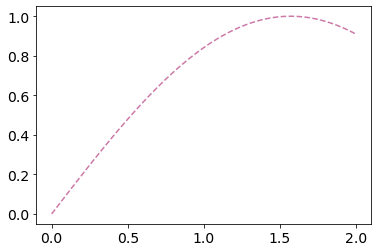

In [9]:
plt.plot(x, np.sin(x), 'C3--');

Matplotlib ajusta los límites de los gráficos de forma automática, pero hay veces que ese ajuste automático no es adecuado dadas nuestras necesidades por lo que puede ser necesario fijar los limites manualmente.

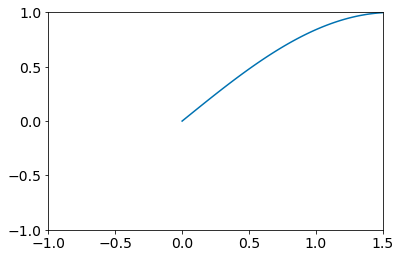

In [13]:
plt.plot(x, np.sin(x))
plt.xlim(-1, 1.5)
plt.ylim(-1, 1);

Otro comando que puede ser de utilidad para fijar los limites de los ejes es _axis()_. El cual permite fijar los 4 límites en un solo paso.

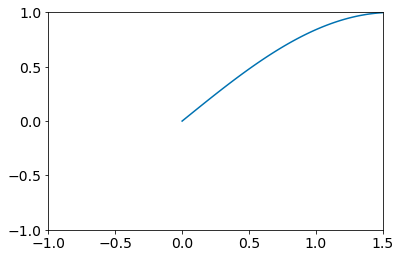

In [14]:
plt.plot(x, np.sin(x))
plt.axis([-1, 1.5, -1, 1]);

Además _axis()_ soporta como argumentos una serie de _strings_  como _equal_, _tight_, _off_ etc.

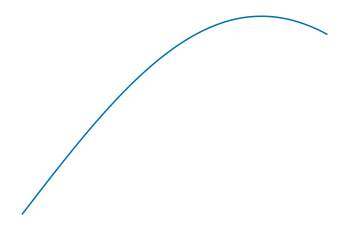

In [15]:
plt.plot(x, np.sin(x))
plt.axis('off');

Matplotlib permite guardar figuras en muchos formatos, uno de los preferidos para el tipo de figuras que se suelen hacer en ciencia es el formato png

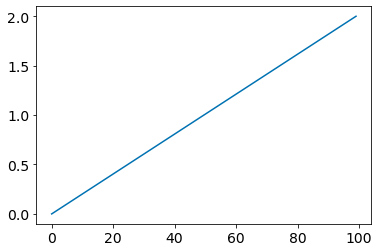

In [16]:
plt.plot(x)
plt.savefig('una_figura.png');

Los siguientes comandos puede no funcionar en tu sistema operativo, el primero es un comando de linux que muestra que la figura está en la misma carpeta que el notebook y el segundo llama al _visualizador de imágenes de ubuntu/gnome

In [17]:
!ls -lh una_figura.png
!eog una_figura.png

-rw-rw-r-- 1 osvaldo osvaldo 9,5K ago 22 15:01 una_figura.png


Una característica que suele confundir a quienes recién empiezan a aprender matplotlib es que es posible usar dos interfaces:

* Orientada a objetos o "axes"
* "pyplot"

Veamos como crear la misma figura usando estos dos estilos:

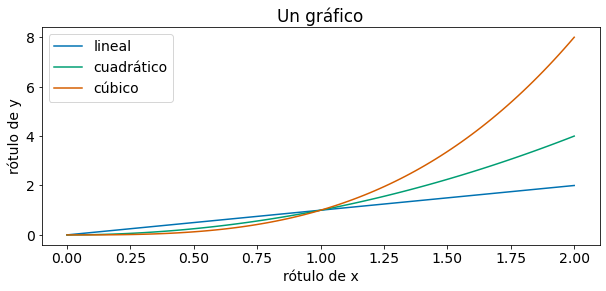

In [18]:
x = np.linspace(0, 2, 100)

plt.figure(figsize=(10, 4))
plt.plot(x, x, label='lineal')
plt.plot(x, x**2, label='cuadrático')
plt.plot(x, x**3, label='cúbico')
plt.xlabel('rótulo de x')
plt.ylabel('rótulo de y')
plt.title("Un gráfico")
plt.legend();

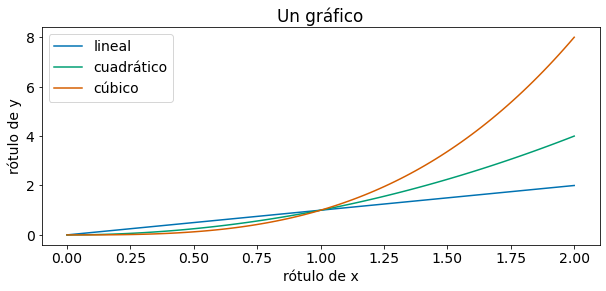

In [20]:
x = np.linspace(0, 2, 100)  

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(x, x, label='lineal')
ax.plot(x, x**2, label='cuadrático')
ax.plot(x, x**3, label='cúbico')
ax.set_xlabel('rótulo de x')
ax.set_ylabel('rótulo de y')
ax.set_title("Un gráfico")
ax.legend();

La diferencia más notoria es que en el estilo orientado a objetos, la figura y los "axes" se crean de forma explicita y luego se utilizan métodos (notese la notación `ax.`), mientras que en el estilo "pyplot" matplotlib crea de forma automática las figuras y Axes.

La documentación de matplotlib (y ejemplos de terceros) usan ambos estilos. La recomendación es que el modo preferido es el orientado a objetos. Este modo es además el más conveniente para gráficos complejos, y cuando se realizan gráficos como parte de funciones o scripts que serán reutilizados. El estilo pyplot es más conveniente para gráficos rápidos cuando trabajamos de forma interactiva.

La siguiente [figura](https://matplotlib.org/stable/gallery/showcase/anatomy.html#anatomy-of-a-figure) muestra varios de los elementos de una figura de matplotlib


<img src="imagenes/anatomy_figure.png" width="550">


A continuación un ejemplo donde modificamos varios de los valores por defecto

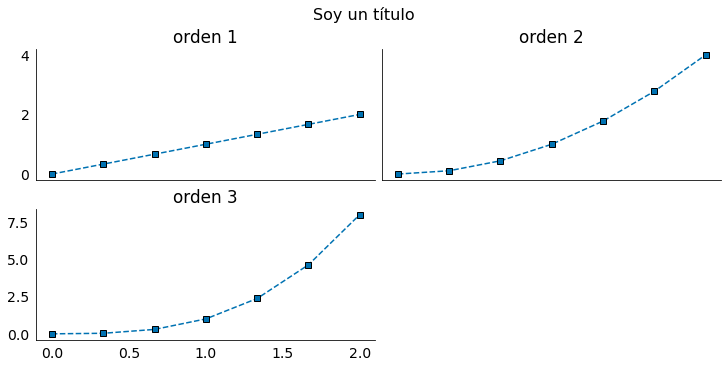

In [17]:
x = np.linspace(0, 2, 7)  

fig, axes = plt.subplots(2, 2, figsize=(10, 5), sharey="row", sharex=True, constrained_layout=True)
for power, ax in zip(range(1, 4), axes.ravel()):
    ax.plot(x, x**power, "C0s--", mec="k")
    #ax.plot(x, x**power, color="C1", marker="s", ls="--", mec="k")
    ax.set_title(f"orden {power}")
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_ticks_position('none') 

fig.suptitle("Soy un título", fontsize=16)
axes[1,1].remove()

Una buena forma de explorar las capacidades de matplotlib es revisar su [galería](https://matplotlib.org/stable/gallery/index.html) de ejemplos. Los ejemplos en esta galería también pueden ser usados como plantillas para nuestros propios gráficos.

## Gráficos estadísticos

Un gráfico común en ciencias es aquel donde cada punto va acompañado de una barra de error, donde el error puede ser una de varias posibles medidas (como la desviación estándar o el error estándard, etc). 

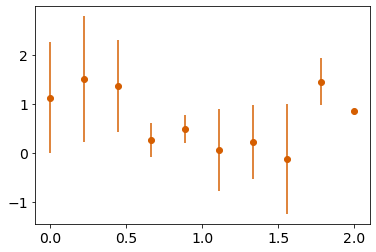

In [21]:
x = np.linspace(0, 2, 10)
error_y = np.random.randn(10)

y = np.sin(x) + error_y

plt.errorbar(x, y, yerr=error_y, fmt='C2o');

### Histogramas

En un [histograma](https://en.wikipedia.org/wiki/Histogram) se representa la frecuencia con la que aparecen los distintos valores en un conjunto de datos. Se utilizan _barras_ contiguas para representar los datos. La superficie (y no la altura) de las barras es proporcional a la frecuencia de datos observados. Los datos son agrupados en _bins_, y suelen graficarse sin normalizar o normalizados. Normalizar implica que la superficie total del histograma suma 1. No hay que confundir los histogramas con los gráficos de barras que se utilizan para comparar categorías o grupos (hombre-mujer, trabajadores_informales-formales-jubilados) y mientras que los histogramas se usan para representar distribuciones, ya sea discretas (árboles infectados) o continuas (presión atmosférica).

Los histogramas son sensibles a la cantidad de agrupamientos o _bins_ que se usan. Si usamos unos pocos _bins_ no lograremos capturar la estructura de los datos (estaremos "sobresuavizando"), si usamos demasiados _bins_ no solo estaremos representando la estructura de los datos si no también el ruido (estaremos "subsuavizando"). Esto se ve más claramente si nos vamos a los extremos, si usamos un solo bin nuestro histograma será una solo barra, por el otro si usamos tantos bins como datos, tendremos lo que se conoce como distribución empírica.

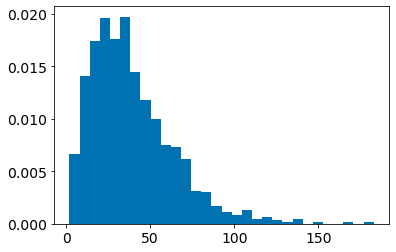

In [31]:
x = np.random.gamma(2.5, 15, size=1000)
#x = np.random.normal(0, 1, size=1000)

plt.hist(x, bins="auto", density=True, cumulative=False);  # probá cambiar los bins, y los demás argumentos.

Por defecto el valor de `bins` es 10, este valor se puede cambiar globalmente definidiendo el valor de `plt.rcParams["hist.bins"]`.  `hist` ofrece un método automático para el computo de los bins, `bins="auto"`. Este método funciona computando dos estimadores `sturges` y `fd` y luego tomando el valor maximo. El estimador de [Sturges](https://en.wikipedia.org/wiki/Histogram#Sturges'_formula) se deriva de la distrbución binomial y asume que la muestra es aproximadamente normal, puede fallar tanto para muestras muy chicas como muy grandes. Mientras que el estimador de Freedman–Diaconis (fd) también asume normalidad, pero es robusto a valores aberrantes (outliers), ya que utiliza el rango intercuartial. La aproximación de matplotlib de usar el máximo de estos dos estimadores suele funcionar bastante bien para un amplio rango de datos. Pero al graficar histogramas puede ser necesarios probar con varios valore de bins.

Aprovechando lo que hemos aprendido generemos un gráfico que muestre la diferencia entre media y mediana

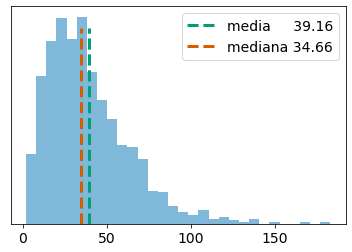

In [35]:
media = np.mean(x)
mediana = np.median(x)

plt.hist(x, bins="auto", alpha=0.5)
plt.yticks([])
plt.axvline(media, ymax=.9, c='C1', lw='3', ls="--", label=f'media {media:>9.2f}')
plt.axvline(mediana, ymax=.9, c='C2', lw='3', ls="--", label=f'mediana {mediana:.2f}')
plt.legend();

## Alternativas a matplotlib

La versatilidad de matplotlib, que permite trabajar sobre cada elemento de una gráfica puede a veces convertirse en un problema. Hay situaciones donde no nos interesa ese grado de control y es preferible un mayor grado de automatización.

Seaborn es una librería que se focaliza en gráficos estadísticos y que esta construida sobre matplotlib. Por lo que se la puede considerar una extensión de matplotlib, que facilita hacer decenas de gráficos y mantiene, de ser necesario, la posiblidad de modificarlos usando matplotlib.

La forma estándard de importar seaborn es:

In [36]:
import seaborn as sns

Para graficar un histograma podemos hacer

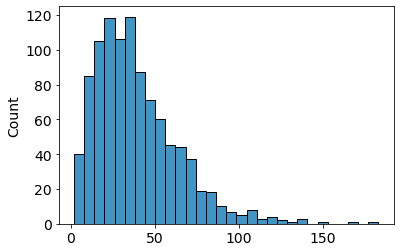

In [37]:
sns.histplot(x);

Vemos que el resultado es similar a maplotlib, pero el estilo es ligeramente distinto y obtenemos un rótulo genérico para el eje y. Como ya mencionamos seaborn, está escrito sobre Matplotlib, por que lo que una vez obtenido un gráfico, podemos editarlo usando la sintaxis de matplotlib sin problemas.

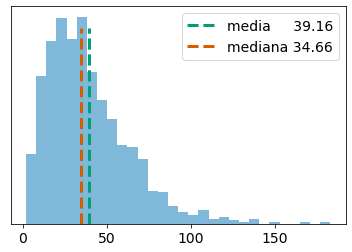

In [38]:
ax = sns.histplot(x, edgecolor="None", alpha=0.5)

ax.set_yticks([])
ax.set_ylabel("")
ax.axvline(media, ymax=.9, c='C1', lw='3', ls="--", label=f'media {media:>9.2f}')
ax.axvline(mediana, ymax=.9, c='C2', lw='3', ls="--", label=f'mediana {mediana:.2f}')
ax.legend();

### Kernel Density plot

Este estimador es una laternativa a los histrogramas. Podemos pensarlo como una versión continua o _suavizada_ de un histograma. Un gráfico [_KDE_](https://en.wikipedia.org/wiki/Kernel_density_estimation) se dibuja de la siguiente forma: se reemplaza cada dato por una distribución de probabilidad y luego se suman todas esas distribuciones. El área total obtenida se normaliza a fin de que sume 1. En la práctica la distribución más usada es la Gaussiana. El nombre genérico para esas distribuciones es la de _kernel_.

De forma análoga a lo que sucede con los _bins_ los KDE son sensibles a un parámetro llamado _bandwith_. Existen varias _heurísticas_ (reglas empíricas que suelen funcionar bien en la práctica) para ajustar el _bandwith_ de forma automática de acuerdo a los datos.

Es posible usar matplotlib para graficar un kde, pero no existe la función `plt.kde`, por lo que necesitamos calcular el kde usando SciPy y luego usar matplotlib para graficar el resultado.

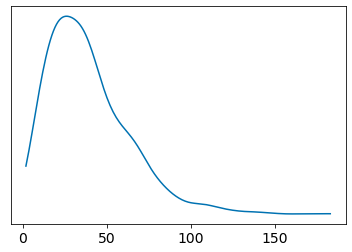

In [39]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(x)
xs = np.linspace(min(x), max(x), 200)
plt.plot(xs, kde(xs))
plt.yticks([]);

En cambio en seaborn esto es mucho más simple

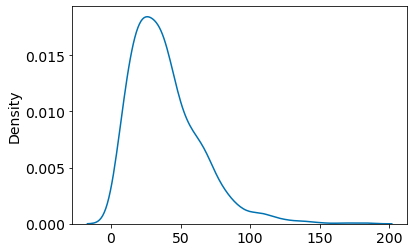

In [40]:
sns.kdeplot(x);  #también ver la función sns.distplot()

Desafortunadamente, seaborn al igual que muchas otras implementaciones de KDEs tanto en Python como otros lenguajes. No corrigen automáticamente los bordes. Algunas implementaciones como el KDE en ArviZ (una librería focalizada en gráficos y métodos para estadística Bayesiana) si lo hacen. Es decir en la figura anterior, si bien no hay observaciones con valores inferiores a 0. Seaborn (y SciPy en general) estiman densidades por debajo de 0. Hay casos donde esa solución no es correcta. Por ejemplo no tiene sentido si estuvieramos trabajando con variables como alturas. La solución que ofrece Seaborn es teóricamente incorrecta, pero es simple y útil en muchos casos. La solución es simplemente recortar el resultado según un valor minimo y máximo provisto por el usuario.

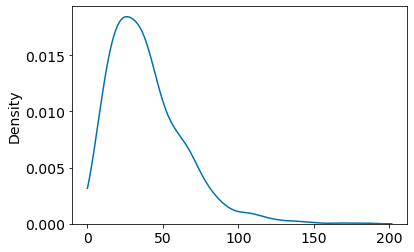

In [41]:
sns.kdeplot(x, clip=(0, None));

### Stripplot

Este tipo de gráficos sirve para visualizar un conjunto de datos donde una variable es métrica y las demás son categóricas.

Para visualizarlos podemos usar la función _strippplot_ de seaborn (un gráfico similar es el _swarmplot_). Los stripplot se suelen graficar agregado un poco de ruido (_jitter_ en inglés) en lo largo del eje de las $x$, esto es simplemente un _truco_ para facilitar la visualización de los puntos, que caso contrario caerían todos en una misma linea ya que dentro de una misma categoría no hay dispersión.

Puede ser útil en si mismo o puede ser usado superpuesto sobre un _boxplot_ o _violinplot_. 

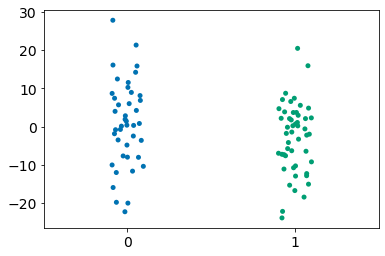

In [45]:
y0 = np.random.normal(0, 10, size=42)
y1 = np.random.normal(-1, 10, size=50)

sns.stripplot(data=[y0, y1], jitter=True);

### Cuantiles y gráficos de cajas o de bigotes (Box plot o Wisker-plot)

Los [cuantiles](https://en.wikipedia.org/wiki/Quantile) son puntos de corte que dividen al conjunto de datos en grupos de igual tamaño. Existen varios nombres para  los cuantiles según la cantidad de divisiones que nos interesen.

* Los cuartiles son los tres puntos que dividen a la distribución en 4 partes iguales, se corresponden con los cuantiles 0.25, 0.50 y 0.75.
* Los quintiles dividen a la distribución en cinco partes (corresponden a los cuantiles 0.20, 0.40, 0.60 y 0.80);
* Los deciles, que dividen a la distribución en diez partes.
* Los percentiles, que dividen a la distribución en cien partes.
* La mediana es el percentil 50 o el cuartil 0.5.
    
En Python el cálculo de estos estadísticos puede realizarse fácilmente usando funciones predefinidas en NumPy.

In [46]:
x = np.random.normal(0, 1, 201)

q = np.percentile(x , [25, 50, 75])
q

array([-0.8582576 , -0.22663648,  0.55775046])

y es facil evaluar que efectivamente estos valores dividen a los datos en 4 grupos de (aproximadamente) el mismo tamaño

In [47]:
len(x[x< q[0]]), len(x[(x > q[0]) & (x < q[1])]), len(x[(x > q[1]) & (x < q[2])]), len(x[x> q[2]])

(50, 49, 49, 50)

Veamos los cuartiles en el contexto de la distribución de los datos

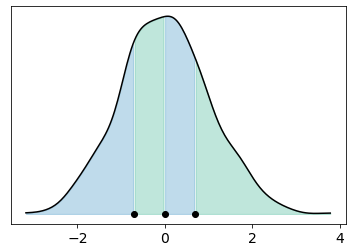

In [67]:
x = np.random.normal(0, 1, 1000)
q = np.percentile(x , [25, 50, 75])


kde = gaussian_kde(x)
xs = np.linspace(min(x), max(x), 200)
density = kde(xs)

_, ax = plt.subplots()
ax.plot(xs, density, "k")
ax.set_yticks([]);
ax.plot(q, (0, 0 ,0), 'ko')

ax.fill_between(xs[xs< q[0]], density[xs < q[0]], color="C0", alpha=0.25)
ax.fill_between(xs[(xs > q[0]) & (xs < q[1])], density[(xs > q[0]) & (xs < q[1])], color="C1", alpha=0.25)
ax.fill_between(xs[(xs > q[1]) & (xs < q[2])], density[(xs > q[1]) & (xs < q[2])], color="C0", alpha=0.25)
ax.fill_between(xs[xs > q[2]], density[xs > q[2]], color="C1", alpha=0.25);

Los [gráficos de caja](https://en.wikipedia.org/wiki/Box_plot) son una forma de graficar distribuciones basada en cuartiles. Al igual que el _stripplot_ este tipo de gráficos es muy útil cuando se quieren comparar varios grupos de datos en simultaneo. La caja está delimitada por el primer y tercer cuartil, mientras que la línea dentro de la caja es el segundo cuartil (la mediana). Los _bigotes_ pueden indicar varias medidas, por eso es siempre importante leer/escribir la leyenda o texto que acompaña a un boxplot, a veces se usa una desviación estandard, otras veces los percentiles 2 y 98, otras veces (como en el gráfico a continuación) es una función del rango intercuartil y los valores por fuera de los bigotes se suelen considerar como datos aberrantes (ver más adelante).

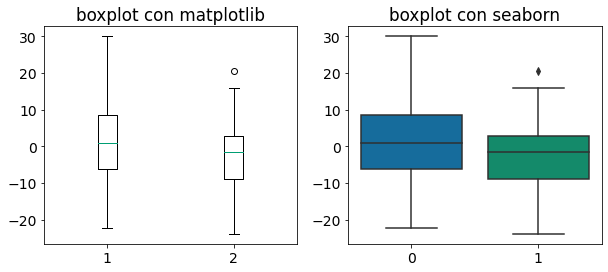

In [80]:
y2 = np.concatenate([y0, [30]])

_, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].boxplot((y2, y1))
ax[0].set_title("boxplot con matplotlib")
sns.boxplot(data=[y2, y1], ax=ax[1])
ax[1].set_title("boxplot con seaborn");

### Gráficos de violín (violin plot)

Los gráficos de [violín](https://en.wikipedia.org/wiki/Violin_plot) son una combinación de gráficos de caja con kde.

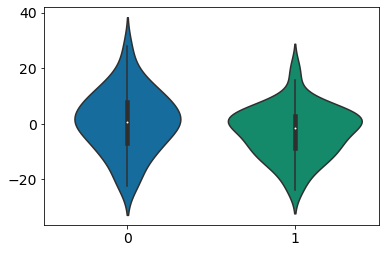

In [70]:
sns.violinplot(data=[y0, y1]);

### Datos aberrantes

Los datos aberrantes (_outliers_) son valores que están muy alejados de la mayoría de los valores de una distribución. Los datos aberrantes pueden ser errores de medición, errores al procesar los datos o incluso valores correctos pero inusuales (sobre todo cuando la muestra es pequeña). Siempre es buena idea revisar si nuestros datos contienen datos aberrantes y en muchos casos puede llegar a ser conveniente removerlos. Siempre que se remueve un dato aberrante deberá reportarse que fue removido y explicar cual fue el criterio usado para removerlos. Es importante destacar que la decisión de remover datos aberrantes no debe ser tomada a la ligera. Si un supuesto dato _aberrante_ fuese un valor correcto quizá nos estaría indicando que no comprendemos del todo el fenómeno estudiado y al dejarlo de lado podríamos estar perdiéndonos de un importante descubrimiento!

Existen un gran número de criterios para identificar datos aberrantes. Dos muy usados son:


   * todo valor por debajo de $\mu$-n$\sigma$ y por encima de $\mu$+n$\sigma$. Donde n = 1, 2, 3, 6 etc...
   * Se define el rango intercuartil como $IQR = q2 - q3 = p25-p75$ y se define como _aberrante_ todo valor por debajo de $q2-1.5*IQR$ y por encima de $q3+1.5*IQR$

El primer criterio suele ser usado para distribuciones que se asemejan a Gaussianas mientras que el segundo es más general ya que el rango intercuartil es una medida más robusta de la dispersión de una distribución que la desviación estándar.

Según la desigualdad de Chebyshev, al menos  $1 - \frac{1}{k^2}$ de los valores de una distribución están dentro $k$ desviaciones estandard. Es decir casi todos los valores de una distribución de probabilidad están cerca de la media. Por lo tanto el 75% y el 89% de los valores de una distribución se encuentran dentro de 2 y 3 desviaciones estandard, respectivamente. La desigualdad de Chebyshev indica una cota, para varias distribuciones es posible que los valores se encuentren mucho más concentrados alrededor de la media. Por ejemplo esto sucede con las curvas Gaussianas. Para una curva Gaussiana se cumple la regla 68-95-99,7 es decir el 68 por cierto de los datos se encuentra dentro de 1 desviación estandard, el 95 dentro de 2 y el 99.7 dentro de 3.

## Relación entre dos variables

Los gráficos que hasta ahora hemos visto sirven para visualizar una variable por vez, (aunque _sns.kdeplot()_ soporta la visualización de dos variables). En muchos casos necesitamos entender la relación entre dos variables. Dos variables están inter-relacionadas, si el conocer el valor de una de ellas provee de información sobre el valor de la otra.

###  Gráfico de dispersión

Un [gráfico de dispersión](https://en.wikipedia.org/wiki/Scatter_plot) es un gráfico científico que utiliza las coordenadas cartesianas para mostrar los valores de dos variables en simultaneo. Estos gráficos son la forma más simple de visualizar la relación entre dos variables.

Supongamos que tenemos dos variables, que creativamente llamaremos $x$, $y$.

In [92]:
x = np.random.normal(size=5000)
y = np.random.normal(x, 1) 

Usando matplotlib podemos graficar ambas variables usando la función _scatter_

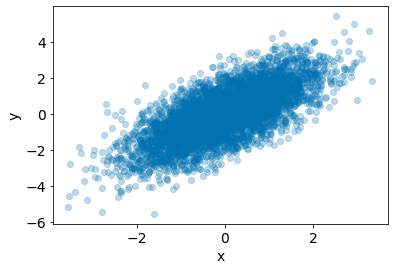

In [93]:
plt.scatter(x, y, alpha=0.25)
plt.xlabel('x')
plt.ylabel('y');

Seaborn provee de múltiples opciones para visualizar relaciones entre dos variables, varias de ellas están contenidas en la función _joinplot_. Esta función además de mostrar el gráfico de dispersión muestra las distribuciones marginales de $x$ e $y$.

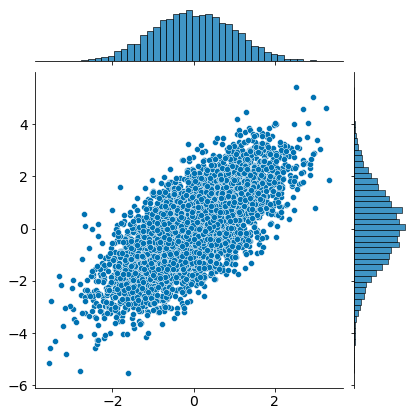

In [94]:
sns.jointplot(x=x, y=y,  kind='scatter');

El siguiente gráfico usa un _kernel density estimation_ como vimos anteriormente, lo hace tanto para las distribuciones marginales como la distribución conjunta.

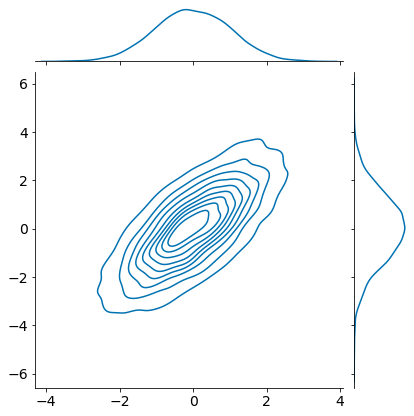

In [95]:
sns.jointplot(x=x, y=y, kind='kde');

Un gráfico de _hexbin_ es similar a un histograma, pero bidimensional. El nombre se debe a que los datos son agrupados en celdas hexagonales. ¿Por qué hexágonos en vez de cuadrados o triángulos? Simplemente por que las celdas hexagonales introducen una menor distorsión en los datos que otras opciones. Esto se debe a las siguientes razones:

* Los hexágonos se relacionan con sus vecinos por lados (los cuadrados y triángulos lo hacen por vértices y lados). Es decir se vinculan con sus vecinos de forma más simétrica. 
* Los hexágonos son el polígono con mayor número de lados que mejor cubren ([teselan](https://es.wikipedia.org/wiki/Teselado)) una superficie plana.
* Los hexágonos introducen menor distorsión visual que por ejemplo los cuadrados. Un malla cuadrada nos hace que tendamos a mirar en sentido horizontal y vertical.

Los hexbin son útiles cuando necesitamos visualizar muchos datos. Por muchos me refiero a números por encima de las centenas de miles de datos. Cuando tenemos una gran cantidad de datos los puntos empiezan a superponerse y puede que ciertos patrones pasen desapercibidos, por lo que visualizar datos agrupados y no los datos _crudos_ suele ser buena idea. Además calcular los _hexbin_ tiene un costo menor que los KDE.

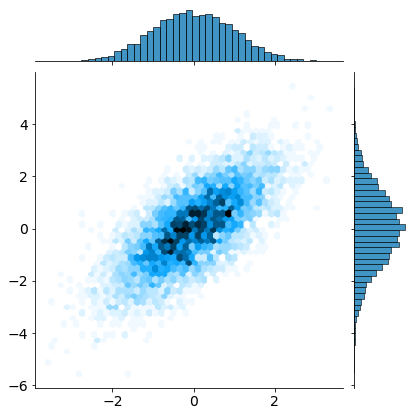

In [96]:
sns.jointplot(x=x, y=y,  kind='hex');  # ver también plt.hexbin();

Una alternativa para evitar que algunos puntos opaquen al resto, en un gráfico de dispersión _común_, es hacer los puntos semitransparentes. En matplotlib la transparencia de los objetos es controlada mediante un parámetro llamado _alpha_ que va entre 0 y 1. Este es un buen momento para volver algunas celdas atrás y ver como este y otros parámetros pueden ser usados para modificar las gráficas realizadas.

### Correlación

Al trabajar con dos variables resulta por lo general interesante preguntarse por la relación entre ellas. Decimos que dos variables están relacionadas si una provee _información_ sobre la otra. Si en cambio una variable no ofrece información sobre otra decimos que son independientes. 

La correlación es una medida de la dependencia de dos variables. Existen varios coeficientes de correlación el más comunmente usado es el coeficiente de correlación de Pearson. Este coeficiente solo sirve para medir relaciones lineales entre variables. El coeficiente de correlación de Pearson es el resultado de dividir la covarianza de las dos variables por el producto de sus desviaciones estándar:

$$\rho_{(x,y)}={E[(x-\mu_x)(y-\mu_y)] \over \sigma_x\sigma_y}$$

En palabras (que puede ser más oscuro que en fórmulas), el coeficiente de correlación de Pearson indica la variación de una variable al variar la otra respecto de la variación intrínseca de cada una de las variables :-)

¿Por que usar el coeficiente de Pearson y no directamente la covarianza? Por que al dividir por el producto de las varianzas estámos estandarizando el coeficiente y por lo tanto simplificando su interpretación al hacerlo independiente de la unidades de nuestras variables. Al dividir por las desviaciones estándar, obtenemos una cantidad que varía entre -1 y 1 y que no tiene dimensiones! 

In [102]:
import scipy.stats as stats
f"{stats.pearsonr(x, y)[0]:.2f}"

'0.71'

En la siguiente imagen se puede ver varios conjuntos de datos y sus respectivos coeficientes de correlación de Pearson. Es importante notar que el coeficiente de correlación de Pearson refleja la linearidad y la dirección de dicha linearidad (primera fila), pero no la pendiente de dicha relación (fila del medio). Tampoco es capaz de capturar relaciones no-lineales. En la fila del medio la línea con pendiente cero tiene un coeficiente de correlación de Pearson indefinido, ya que la varianza de la variable $y$ es 0.

<img src='imagenes/correlación.png' width=600> 

#### Correlación y causalidad

Si existe algún tipo de mecanismo que hace que una variable dependa de otra deberá existir correlación (aunque no necesariamente lineal). Pero lo opuesto no es siempre cierto, dos variables pueden estar correlacionadas sin que exista ningún tipo de mecanismo que las vincule. Dado el gran conjunto de variables que es posible medir no debería ser sorprendente que existan correlaciones [espurias](http://www.tylervigen.com/). Por ejemplo en la siguiente figura se puede ver que el número piratas y la media de la temperatura global están inversamente correlacionados.

<img src='http://upload.wikimedia.org/wikipedia/commons/thumb/d/de/PiratesVsTemp%28en%29.svg/1024px-PiratesVsTemp%28en%29.svg.png'> 

Este gráfico fue creado a propósito para ilustrar, entre otros puntos, que correlación no implica causalidad (notesé además que el orden de los datos en el eje $x$ es erróneo y la escala es al menos _problemática_). Para más detalles del origen de esta gráfica leer esta entrada de [wikipedia](https://es.wikipedia.org/wiki/Pastafarismo#Los_piratas_y_el_calentamiento_global) 

La aparente relación entre las variables temperatura media y cantidad de piratas podría ser explicada de varias formas, quizá es pura casualidad o quizá se podría establecer que los cambios introducidos por la revolución industrial terminaron por un lado por un aumentando la cantidad de $CO_2$ (y otros gases de invernadero) y por el otro produciendo cambios socio-culturales y tecnológicos que llevaron (luego de una larga cadena de sucesos) a la disminución de los piratas. Pero ¡no es cierto que podamos contrarrestar el calentamiento global simplemente aumentando la cantidad de piratas!

Para poder establecer una relación causal a partir de una correlación hace falta poder establecer y probar la existencia de un mecanismo que vincule ambas variables. Espero que este ejemplo haya servido para ayudarles a entender que correlación no implica  causalidad. 

<img src='http://imgs.xkcd.com/comics/correlation.png' alt="xkcd">

## Ejercicios

1. Modifique la función `mcpi` del capítulo anterior para dibujar, usando matplotlib, los puntos dentro del cuadrado y dentro del cuarto de círculo. Agregue un leyenda con el valor estimado de $\pi$.


2. Use un histograma para representar la distribución obtenida con la función `mcplantas`, incluya el valor observado.


3. Idem anterior pero usando un KDE


4. Busque en la [galería de matplotlib](https://matplotlib.org/stable/gallery/index.html) un gráfico que le interese. Modifiquelo (cambie datos, colores, leyenda, ejes, rótulos, títulos, cantidad de subplots, et)


5. Ideam anterior pero de la [galería de seaborn](https://seaborn.pydata.org/examples/index.html)


6. Dentro de la carpeta `datos` encontrará el archivo `muestra.dat`. Use 3 gráficos distintos para comparar las distribuciones de `X`, `Y` y `Z`.


7. Usando datos propios realize un gráfico de intéres. Asuma que es un gráfico para mostrar en una publicación o charla.

## Para seguir leyendo

* [Data to viz](https://www.data-to-viz.com/)
* [Fundamentals of Data Visualization](https://clauswilke.com/dataviz/)
* [Think Stats](http://greenteapress.com/thinkstats/)
* [Data Analysis with Open Source Tools](http://shop.oreilly.com/product/9780596802363.do)